class: [3 1 1 3 1 1 1 3 1 3]
bounding boxes: [[ 63  67 101  72]
 [157  50  50 122]
 [208  50  21  60]
 [ 52  32  22  20]
 [229  49  22  60]
 [  2  58  39 113]
 [198  50  18  57]
 [ 19  20  34  34]
 [132  46  10  29]
 [ 80  48  55  26]]


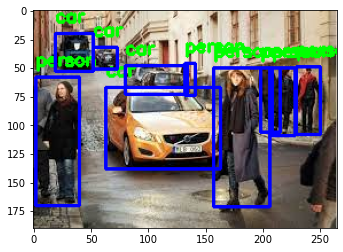

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


def ssd_detect(img):

    config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
    frozen_model='frozen_inference_graph.pb'

    model=cv.dnn_DetectionModel(frozen_model,config_file)
    
    
    classLabels=[]
    file_name='Labels.txt'
    with open(file_name,'rt')as fpt:
        classLabels=fpt.read().rstrip('\n').split('\n')
    model.setInputSize(320,320)
    model.setInputScale(1.0/127.5)##255/2=127.5
    model.setInputMean((127.5,127.5,127.5))## mobilenet=>[-1,1]
    model.setInputSwapRB(True)

    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

    ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5) 


    font_scale=0.5
    font=cv.FONT_HERSHEY_SIMPLEX
    for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
        cv.rectangle(img,boxes,(255,0,0),2)
        cv.putText(img,classLabels[ClassInd-1],(boxes[0]+0,boxes[1]-10),font,fontScale=font_scale,color=(0,255,0),thickness=2)
    
    
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    cv.imwrite("object.png",cv.cvtColor(img,cv.COLOR_BGR2RGB))

    return bbox,ClassIndex,confidence

img=cv.imread('object.jpg')
box,Cindex,confidence=ssd_detect(img)
print('class:',Cindex)
print('bounding boxes:',box)